In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

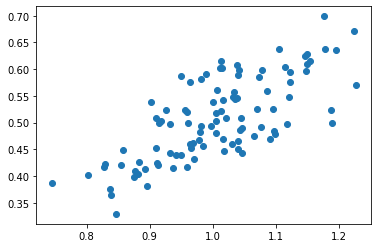

In [5]:
np.random.seed(0)

x_vals = np.random.normal(1, 0.1, 100).astype(np.float32)
y_vals = (x_vals * (np.random.normal(1, 0.05, 100) - 0.5)).astype(np.float32)

plt.scatter(x_vals, y_vals)
plt.show()

In [13]:
def my_output(X, weights, biases):
    return tf.add(tf.multiply(X, weights), biases)

In [7]:
def loss_func(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [8]:
my_opt = tf.optimizers.SGD(learning_rate=0.02)

In [9]:
tf.random.set_seed(1)
np.random.seed(0)

weights = tf.Variable(tf.random.normal(shape=[1]))
biases = tf.Variable(tf.random.normal(shape=[1]))
history = list()

In [16]:
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    with tf.GradientTape() as tape:
        predictions = my_output(rand_x, weights, biases)
        loss = loss_func(rand_y, predictions)
        
    history.append(loss.numpy())
    gradients = tape.gradient(loss, [weights, biases])
    my_opt.apply_gradients(zip(gradients, [weights, biases]))
    
    if (i + 1) % 25 == 0:
        print(f'Step # {i+1} Weights: {weights.numpy()} Biases: {biases.numpy()}')
        print(f'Loss = {loss.numpy()}')

Step # 25 Weights: [-0.50642693] Biases: [0.9811575]
Loss = 0.0013587357243523002
Step # 50 Weights: [-0.46770212] Biases: [1.005025]
Loss = 8.333080040756613e-05
Step # 75 Weights: [-0.47932613] Biases: [0.9803503]
Loss = 0.00047265953617170453
Step # 100 Weights: [-0.4588736] Biases: [0.98604697]
Loss = 1.1310258742014412e-05


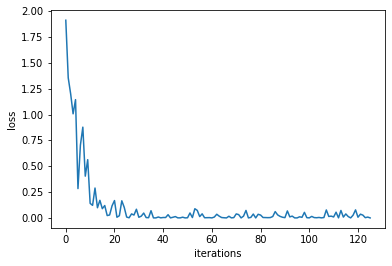

In [17]:
plt.plot(history)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

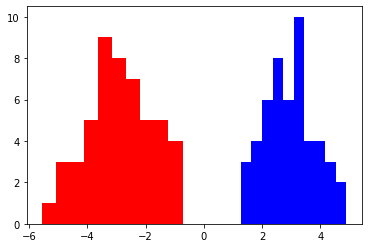

In [18]:
np.random.seed(0)

x_vals = np.concatenate((np.random.normal(-3,  1, 50),
                        np.random.normal(3, 1, 50))
                       ).astype(np.float32)
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50))).astype(np.float32)

plt.hist(x_vals[y_vals==1], color='b')
plt.hist(x_vals[y_vals==0], color='r')
plt.show()

In [19]:
def loss_fuct(y_true, y_pred):
    return tf.reduce.mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred))

In [21]:
tf.random.set_seed(1)
np.random.seed(0)
weights = tf.Variable(tf.random.normal(shape=[1]))
biases = tf.Variable(tf.random.normal(shape=[1]))
history = list()

In [24]:
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    
    with tf.GradientTape() as tape:
        predictions = my_output(rand_x, weights, biases)
        loss = loss_func(rand_y, predictions)
        
    history.append(loss.numpy())
    gradients = tape.gradient(loss, [weights, biases])
    my_opt.apply_gradients(zip(gradients, [weights, biases]))
    
    if (i + 1) % 25 == 0:
        print(f'Step # {i+1} Weights: {weights.numpy()} Biases: {biases.numpy()}')
        print(f'Loss = {loss.numpy()}')

Step # 25 Weights: [0.096991] Biases: [0.5949427]
Loss = 0.042475976049900055
Step # 50 Weights: [0.15178035] Biases: [0.54626006]
Loss = 0.01849176362156868
Step # 75 Weights: [0.15344135] Biases: [0.49713552]
Loss = 0.02255217358469963
Step # 100 Weights: [0.14231898] Biases: [0.52130735]
Loss = 0.005698272027075291


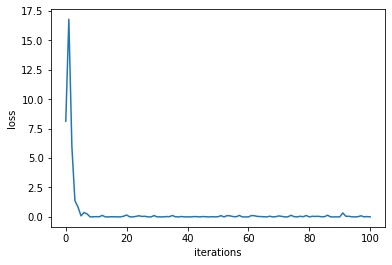

In [25]:
plt.plot(history)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()